In [20]:
import numpy as np
import cv2
import pywt
from PIL import Image, ImageFilter
import random
import math
import cmath
from scipy.fftpack import dct
from scipy.fftpack import idct
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import time
import os
import statistics
import urllib.request
import threading

In [21]:
sdl = []
class PBIL1(object):
    def __init__(self,original_image,Image_after_idct,n=5,m=5,adaptive=False,iterations=1000,lr=0.2,ms=0.05,range=1):
        self.PV=np.full((1,m),0.5)
        self.n=n
        self.m=m
        self.imgMAT = original_image ## np.random.uniform(low=0.0, high=255.0,size=(n,m)) #Should be given through constructor
        self.pop = np.random.choice(2,self.n*self.m,self.PV.tolist()).reshape(self.n,self.m)
        self.TimgMAT = Image_after_idct #np.random.uniform(low=0, high=0,size=(n,m)) #given imgMAT to be TRUNC 
        self.fitness= np.zeros(self.n)
        self.best_chromosome_index= -1
        self.best_chromosome_list = np.array
        self.best_chromosome_lists = []
        self.LR= lr
        self.MS= ms
        self.range = range
        self.sd=[]
        self.adaptive=adaptive
        self.iterations=iterations

    def adaptive_lr(self,i,j):
        self.LR=self.LR*(i/j)
    
    def printData(self):
        print('Probability_vector=\n',self.PV)
        print('Population=\n',self.pop)
        print('Image=\n',self.imgMAT)
        print('Translated/Truncated Image=\n',self.TimgMAT)
        print('fitness=\n',self.fitness,end="\n")
        print('Best Chromosomes possible = ',self.best_chromosome_list)

    def translateImg(self):
        # print(self.pop)
        for i in range(self.n):
            for j in range(self.m):
                if self.pop[i][j]==1:
                    # print(self.TimgMAT[i][j])
                    self.TimgMAT[i][j] = np.round((self.imgMAT[i][j]))+1
                else:
                    self.TimgMAT[i][j] = np.round((self.imgMAT[i][j]))
    
    def calculate_fitness(self):
        self.fitness=np.zeros(self.n) # resetting fitness matrix to zero
        for i in range(self.n):
            for j in range(self.m):
                self.fitness[i]+=abs(self.TimgMAT[i][j] - self.imgMAT[i][j])
        self.best_chromosome_index = np.where(self.fitness == np.amin(self.fitness))
        self.best_chromosome_list=[i for i in self.pop[self.best_chromosome_index[0]].tolist()]
        
        for j in range(-self.range,self.range):
          for k in np.where(self.fitness == (np.amin(self.fitness)+j)):
            for i in k:
              self.best_chromosome_lists.append(self.pop[i].tolist())
        # print('Best Chromosomes list = \n',self.best_chromosome_lists)

        # print('Best Chromosomes possible = ',self.best_chromosome_list)
    
    def update_PV(self):
        Solution_Vector = np.zeros(len(self.best_chromosome_list[0]))
        for i in self.best_chromosome_lists:
          for j in range(len(i)):
            Solution_Vector[j] += (i[j] * 1/len(self.best_chromosome_lists))
       
        for i in range(len(self.PV)):
            self.PV[i]=self.PV[i]*(1-self.LR)+Solution_Vector[i]*self.LR
#         print('updated PV',self.PV)
        
    def mutate_PV(self):
        for i in range(len(self.PV)):
            self.PV[i]=self.PV[i]*(1-self.MS)+random.randint(0, 1)*self.LR
#         print('mutated PV',self.PV)

    def run(self):
        j=1
        while(True):
            j = j+1
            if j==self.iterations+1:
                sdl.append(self.sd)
                return self.TimgMAT
            if self.adaptive:    
                self.adaptive_lr(j,self.iterations+1)
            self.pop= np.random.choice(2,self.n*self.m,self.PV.tolist()).reshape(self.n,self.m)
            self.translateImg()
            self.calculate_fitness()
            self.update_PV()
            self.mutate_PV()
            BC=self.best_chromosome_list
            # self.printData()
            tmp=statistics.stdev(self.fitness.tolist())
            # print(self.fitness.tolist())
            self.sd.append(tmp)
            # print('Iteration',j,'\n Fitness Value=',tmp)
            # print()
            if len(BC)==self.n and np.amin(self.fitness)<=0:
                return self.TimgMAT
        

Water Mark


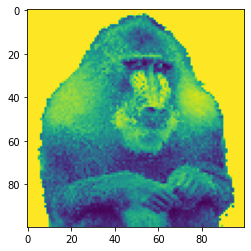

Image


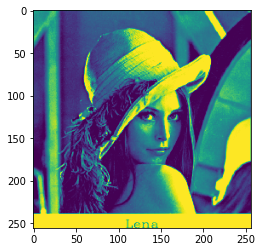

After IDCT


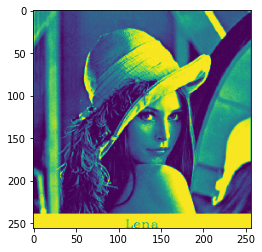

Original matrix 
 [[128 119 122 ... 135 137  92]
 [122 150 155 ... 182 186  91]
 [123 147 153 ... 162 159  72]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
matrix after IDCT 
 [[113186.85977505  87697.34106924  63941.10745182 ...  69374.02128498
   70209.74971591  46895.06539909]
 [110114.85977505 103569.34106924  80837.10745182 ...  93438.02128498
   95297.74971591  46383.06539909]
 [110168.29722276 101762.50153976  79840.79461262 ...  83193.67099313
   81596.26084854  36856.42275887]
 ...
 [130560.         130560.         130560.         ... 130560.
  130560.         130560.        ]
 [130560.         130560.         130560.         ... 130560.
  130560.         130560.        ]
 [130560.         130560.         130560.         ... 130560.
  130560.         130560.        ]]
matrix after PBIL 
 [[128. 120. 122. ... 135. 138.  92.]
 [122. 150. 156. ... 183. 187.  92.]
 [123. 148. 153. ... 162. 160.  72.]
 ...
 [256. 255. 256. ... 2

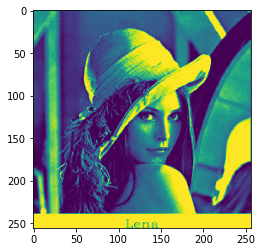

matrix after PBIL 
 [[128. 120. 123. ... 136. 138.  93.]
 [123. 150. 156. ... 182. 186.  91.]
 [124. 148. 154. ... 163. 160.  72.]
 ...
 [256. 256. 255. ... 255. 256. 255.]
 [256. 255. 256. ... 256. 256. 256.]
 [255. 256. 256. ... 256. 256. 255.]]


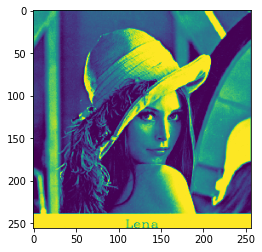

[[7.836300022281924, 7.73870045171491, 7.992021718686754, 7.606998196964914, 7.859017394799729, 8.156435230035529, 7.9096886171079985, 7.890658063898888, 8.75197106650951, 8.411462184331056, 8.459359845466915, 7.953972023830757, 8.66523278343845, 8.099772297695152, 8.29775247150886, 8.595219794096224, 7.063254774868728, 7.935335315449969, 7.779399486628066, 7.574983619667787, 8.13609724815114, 8.54922220834428, 7.805211305878385, 7.666193772713048, 8.69075795872022, 7.491690658427417, 7.312215094164923, 8.008679995455422, 7.835674451994994, 7.42595804870836, 7.516215110235559, 8.032650131634945, 7.532413617291657, 8.59387321658547, 7.5806771905065755, 8.164199369689548, 8.20196858095306, 7.684414732392557, 8.142156659849368, 8.209448018271745, 7.495512342035589, 8.183881665667402, 8.71397345264107, 8.263023551387489, 8.032714970912485, 8.416949374013479, 8.58355344282788, 7.556939699544321, 7.3820753697524575, 8.387920783694218, 7.816350031736517, 8.010149811333118, 7.266654931745337, 

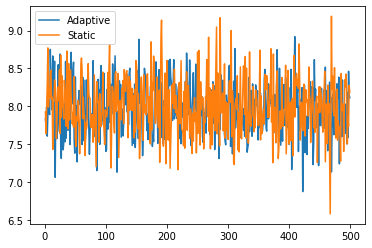

In [22]:
urllib.request.urlretrieve("https://i.ibb.co/kQKsYPg/mandril.png", "/content/mandril.png")
urllib.request.urlretrieve("https://i.ibb.co/C53Xn21/lena.png", "/content/lena.png")
img = Image.open('/content/mandril.png').convert('LA')
img.save('/content/greyscale.png')
watermark = cv2.imread('/content/greyscale.png', 0)
host = cv2.imread('/content/lena.png', 0)
N,M=256,256
P,Q=100,100


try:
 a = cv2.resize(host,(N,M))
 b = cv2.resize(watermark,(P,Q)) #np.random.choice(2,P*Q,[0.5]*P).reshape(P,Q)
#  print(b) #cv2.resize(watermark,(P,Q))
except:
  print('e')

# Uncomment this for binary matrices insted of images 
# a=np.random.choice(2,N*M,[0.5]*N).reshape(N,M)
# b=np.random.choice(2,P*Q,[0.5]*P).reshape(P,Q)

print('Water Mark')
plt.imshow(b)
plt.show()


print('Image')
plt.imshow(a)
plt.show()

d=dct(a)
c=d

for i in range(0,P):  ##Hiding image to upper left corner
  for j in range(0,Q):
    c[i][j]+=b[i][j]

e=idct(c)

print('After IDCT')
plt.imshow(e)
plt.show()

print('Original matrix \n',a)
# print('DCT Original matrix \n',d)
# print('IDCT a without watermark \n',idct(d))
# print('Watermark \n',b)
# print('after adding the watermark',c)
print('matrix after IDCT \n',e)
g = PBIL1(a,e,N,M,True,500) ##Adaptive Learning Rate
h = PBIL1(a,e,N,M,False,500) ##Static Learning Rate


afterimg = g.run()
print('matrix after PBIL \n',afterimg)
plt.imshow(afterimg)
plt.show()


afterimg = h.run()
print('matrix after PBIL \n',afterimg)
plt.imshow(afterimg)
plt.show()
print(sdl)
x=[i for i in range(1,500)]

plt.plot(x, np.array(sdl[0]), label = "Adaptive")
plt.plot(x, np.array(sdl[1]), label = "Static")
plt.legend()
plt.show()